<a href="https://colab.research.google.com/github/RachelRamirez/misclassification_matrix/blob/main/Experiment_PA_Shfl_40D_Lambda1_Lambda2_Lambda3_Lambda4_Lambda5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment PA Shfl 40D Lambda1 Lambda2 Lambda3




## Reduced  capacity neural network with two layers of 40 connections

  Filename "PA_Shfl_w[9,4]_2.0_40D_Misclassification_Cost_Matrix_Example"

#### Check timezone if incorrect restart

In [1]:
# How to change the local time in Google Colab
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/US/Eastern /etc/localtime
!date

#If this doesn't show the local time correctly, then you need to restart.
import time
time.localtime(time.time())

Fri 24 Mar 2023 11:16:27 AM EDT


time.struct_time(tm_year=2023, tm_mon=3, tm_mday=24, tm_hour=15, tm_min=16, tm_sec=27, tm_wday=4, tm_yday=83, tm_isdst=0)

### Reproducible Seeds

In [2]:
#For Reproducibility
import numpy as np
# np.random.seed(1337)  # for reproducibility

import tensorflow as tf
# tf.random.set_seed(33)

import random as python_random
# python_random.seed(4)

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed
seed = 342
tf.keras.utils.set_random_seed(seed) #Possibly use next iteration if the above doesn't work


# Running more than once causes variation.  try adding this:
# Set seed value
seed_value = 56
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

print("TF version: " , tf.__version__ )
print("Keras version: " , tf.keras.__version__ )

TF version:  2.11.0
Keras version:  2.11.0


### Import rest of Library

In [3]:

# from https://github.com/keras-team/keras/issues/2115#issuecomment-204060456
# witha correction on the weighted function in the middle 

'''Train a simple deep NN on the MNIST dataset.
Get to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function  #do i still need this?
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import keras.backend as K
from itertools import product
import functools
from functools import partial
from time import ctime
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.metrics import confusion_matrix
import pickle 
## MORE REPEATABILITY STUFF NEEDED - If theres a way to update this to V2 of Tensorflow great, otherwise I had to use TF 1.0 code
# 5. Configure a new global `tensorflow` session (https://stackoverflow.com/questions/50659482/why-cant-i-get-reproducible-results-in-keras-even-though-i-set-the-random-seeds)
# from keras import backend as K


#I believe thecode below is to help things be repeatable each time different sections in my google colab notebook execute
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

In [4]:
# # I do this initial download to start with so Colab doesn't wait until a run is done to ask if it can download
# import pickle 
# variable_to_be_deleted = np.array((1,10))
# file_name = "delete_later.pkl"

# with open(file_name, 'wb') as handle:
      
#     # A new file will be created
#     pickle.dump(variable_to_be_deleted, handle,  protocol=pickle.HIGHEST_PROTOCOL)

# from google.colab import files
# files.download( file_name )  

# print(file_name, " was saved to Downloads ")

# del(variable_to_be_deleted)
# del(file_name)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Con3"
path = "/content/drive/MyDrive/Con3/"
 
variable_to_be_deleted = np.array((1,10))
file_name = "delete_later.pkl"

with open(path + file_name, 'wb') as handle:
      
    # A new file will be created
    pickle.dump(variable_to_be_deleted, handle,  protocol=pickle.HIGHEST_PROTOCOL)



print(file_name, " was saved to Google MyDrive ")


# import os
# try:
#     os.remove(path+file_name)
#     print(file_name, " was deleted from Google MyDrive ")

# except:
#     print("Error while deleting file : ", path+file_name)

# del(file_name, variable_to_be_deleted)


 5Lambdas1stPhase
 PreExperiment_PA_Shfl_40D_Lambda1_Lambda2_Lambda3
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1720_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1721_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1722_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1723_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1725_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_22_1257_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_22_1259_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_22_1300_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_22_1302_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_22_1304_.pkl'
'w[9,4]_L_1000_10_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1707_.pkl'
'w[9,4]_L_1000_10_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1709_.pkl'
'w[9,4]_L_1000_10_1_1_1_E_1_1_1_1_25_P_0_0_0_

### Define batch, epochs, and format data

In [7]:
batch_size = 256 # I originally had it very  high batch size to reduce the variation in the data each batch and hope it makes the model training more nearly identical which it did, then i bring it back down to something reasonable to get better results training the NN
nb_classes = 10
nb_epoch = 45

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# print(X_train.shape[0], 'train samples')
# print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#Create a Validation Set
X_val = X_test[:7500]   #take the first 7500 for validation
Y_val = Y_test[:7500]   #Take the first 7500 for validation
y_val = y_test[:7500]

X_test = X_test[7500:]  #Keep the last 2500 for test/holdout
Y_test = Y_test[7500:]  #Keep the last 2500 for test/holdout
y_test = y_test[7500:]

print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

#Are the sets relatively balanced? Yes each category is between 8% and 11% per category
Y_train.sum(axis=0)/X_train.shape[0]
Y_val.sum(axis=0)/X_val.shape[0]
Y_test.sum(axis=0)/X_test.shape[0]

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
7500 validation samples
2500 test samples


array([0.1044, 0.1144, 0.0992, 0.102 , 0.0932, 0.0864, 0.1008, 0.1064,
       0.0972, 0.096 ], dtype=float32)

### Weighted Categorical Cross Entropy Class

In [8]:
class WeightedCategoricalCrossentropy(tf.keras.losses.CategoricalCrossentropy):

  def __init__(self, cost_mat, name='weighted_categorical_crossentropy', **kwargs):

    cost_mat = np.array(cost_mat)   
    ## when loading from config, self.cost_mat returns as a list, rather than an numpy array. 
    ## Adding the above line fixes this issue, enabling .ndim to call sucessfully. 
    ## However, this is probably not the best implementation
    assert(cost_mat.ndim == 2)
    assert(cost_mat.shape[0] == cost_mat.shape[1])
    super().__init__(name=name, **kwargs)
    self.cost_mat = K.cast_to_floatx(cost_mat)

  def __call__(self, y_true, y_pred, sample_weight=None):
    assert sample_weight is None, "should only be derived from the cost matrix"  
    return super().__call__(
        y_true=y_true, 
        y_pred=y_pred, 
        sample_weight=get_sample_weights(y_true, y_pred, self.cost_mat),
    )


  def get_config(self):
    config = super().get_config().copy()
    # Calling .update on the line above, during assignment, causes an error with config becoming None-type.
    config.update({'cost_mat': (self.cost_mat)})
    return config

  @classmethod
  def from_config(cls, config):
    # something goes wrong here and changes self.cost_mat to a list variable.
    # See above for temporary fix
    return cls(**config)

def get_sample_weights(y_true, y_pred, cost_m):
    num_classes = len(cost_m)

    y_pred.shape.assert_has_rank(2)
    assert(y_pred.shape[1] == num_classes)
    y_pred.shape.assert_is_compatible_with(y_true.shape)

    y_pred = K.one_hot(K.argmax(y_pred), num_classes)

    y_true_nk1 = K.expand_dims(y_true, 2)
    y_pred_n1k = K.expand_dims(y_pred, 1)
    cost_m_1kk = K.expand_dims(cost_m, 0)

    sample_weights_nkk = cost_m_1kk * y_true_nk1 * y_pred_n1k
    sample_weights_n = K.sum(sample_weights_nkk, axis=[1, 2])

    return sample_weights_n


# Register the loss in the Keras namespace to enable loading of the custom object.
tf.keras.losses.WeightedCategoricalCrossentropy = WeightedCategoricalCrossentropy
 

### Train Model with WeightedCategoricalCross Entropy Function 

In [9]:
def PA_method_epoch(model3, lambda_val, nb_epoch = 5, patience = 5 , **args):
  # print("Parameter values specified for this training-cycle.  Number of epochs: ", nb_epoch, "Number of epochs of Patience: ", patience)
  cost_matrix = np.ones((10,10))

  Truth=9
  Predicted=4

  cost_matrix[Truth, Predicted] = lambda_val
  # print("The cost of a true ", str(Truth), "  predicted as a ", str(Predicted), " is ", lambda_val  )


  # ---------------------------------------------------------------------------------------------------------------------------------
  # Is a Model already created?  
  # ---------------------------------------------------------------------------------------------------------------------------------
  if model3==None:  #"No model was passed through so one will be initiated")

      print("No model was passed through so one will be initiated")

      model3 = Sequential()
      model3.add(Dense(40, input_shape=(784,), kernel_initializer=tf.keras.initializers.glorot_uniform(seed=42)))
      model3.add(Activation('relu'))
      model3.add(Dropout(0.2))
      model3.add(Dense(40, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=42)))
      model3.add(Activation('relu'))
      model3.add(Dropout(0.2))
      model3.add(Dense(10,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=42)))
      model3.add(Activation('softmax'))
      rms = RMSprop()  #https://keras.io/api/optimizers/rmsprop/
      model3.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=rms,  metrics='categorical_accuracy',)

 
  # else:  #A model was passed through, so no other model will be created
  #   # print("A model was passed through")


  def log_confusion_matrix(epoch, logs):
    # Use the model to predict the values from the validation dataset.
    y_prediction3 = model3.predict(X_val, verbose=0)     #I call it y_prediction3 because I just want to make sure this is  updated within and not interfering with the other prediction below
    y_prediction3  = np.argmax(y_prediction3, axis=1)

    #Create confusion matrix 
    cm = confusion_matrix(y_val, y_prediction3)
    cm_array = np.asarray(cm)  #Indiv CM as array for storing
    logs['9T_4P'] = cm[9,4]
    logs['4T_9P'] = cm[4,9]
    logs['cm_per_epoch'] = cm_array.reshape((1,100))
  # Define the per-epoch callback.
  cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix, )


  # ---------------------------------------------------------------------------------------------------------------------------------
  # Will this be a training session with early-stopping? If so user specifies a patience level, and the appropriate callback is used
  # ---------------------------------------------------------------------------------------------------------------------------------
  if patience > 0:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights = True)
    model3_history = model3.fit(X_train, Y_train,
          batch_size=batch_size, epochs=nb_epoch, verbose=0,
          validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True
          ,callbacks = [es_callback, cm_callback]
          )
  #If early-stopping is not needed then the model will be trained without using the ES callback
  else:  # no need to do early-stopping if patience = 0
    model3_history = model3.fit(X_train, Y_train,
          batch_size=batch_size, epochs=nb_epoch, verbose=0,
          validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True
          ,callbacks = [cm_callback]    #<<< -------------- the only thing that changed is no EarlyStop Callback
          )

 

    
  # ---------------------------------------------------------------------------------------------------------------------------------
  # Training complete.  Make Predictions
  # ---------------------------------------------------------------------------------------------------------------------------------
  #Predict
  y_prediction = model3.predict(X_val, verbose=0)
  y_prediction  = np.argmax(y_prediction, axis=1)
  # Y_prediction = np_utils.to_categorical(y_prediction, nb_classes)

  #Create confusion matrix and normalizes it over predicted (columns)
  # result = confusion_matrix(y_val, y_prediction , normalize='pred')



  cm3 = confusion_matrix(y_val, y_prediction)
  cm3 = pd.DataFrame(cm3, range(10),range(10))
  
  # plt.figure(figsize = (10,10))
  # cm3
  # sns.heatmap(cm2, annot=True, annot_kws={"size": 12}) # font size
  # plt.show()
  # cm_using_weighted_new = cm3

  # print(model3_history.history)
  tot_epochs = max(model3_history.epoch)+1  #if the total epochs ran is 28, it'll show up as 27 in the epoch object so we must add 1
  print("Total Epochs: ", tot_epochs)

  #if tot_epochs is the total number of epochs ran then early stop did not happen, and we need not minus patience
  if tot_epochs == nb_epoch:
    restored_weights = tot_epochs
  else:
    restored_weights  = tot_epochs-patience   #when using restore-best-weights and patience, it'll restore the best weights back
  print("Restored weights at ", restored_weights, "Patience used: ", patience)


  return cm3, model3_history, model3, restored_weights


#### Single Plot Function

In [10]:
def plot_fx(model3_history, restored_weights):


  tot_epochs = max(model3_history.epoch)+1

  #Label is the epoch weights are restored 
  label = f"{restored_weights}"
  #Label_vale is the value at which the epoch weights are restored 
  label_value = f"{ model3_history.history['val_categorical_accuracy'][restored_weights-1]}"
  print("Label: ", label, "Val_Cat_Acc Value: ", label_value)



  plt.plot(range(1,tot_epochs+1), model3_history.history['categorical_accuracy'],)
  plt.plot(range(1,tot_epochs+1), model3_history.history['val_categorical_accuracy'])
  plt.xlim(xmin=1)

  plt.scatter((restored_weights), model3_history.history['val_categorical_accuracy'][restored_weights-1] , color='orange')

  plt.annotate(text=label,  xy=(restored_weights, model3_history.history['val_categorical_accuracy'][restored_weights-1]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch (starts at 1)')

  
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  
  

  plt.plot(range(1,tot_epochs+1), model3_history.history['loss'])
  plt.plot(range(1,tot_epochs+1), model3_history.history['val_loss'])
  plt.xlim(xmin=1)
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch (starts at 1)')
  plt.legend(['train', 'val'], loc='upper left')
  plt.scatter(restored_weights, model3_history.history['val_loss'][restored_weights-1], color='orange')
  plt.annotate(text=label,  xy=(restored_weights, model3_history.history['val_loss'][restored_weights-1]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
  plt.show()


#### Plot all three phases together

In [30]:
def plot_5_fx(model1_history, model2_history, model3_history, model4_history, model5_history,
              restored_weights1, restored_weights2, restored_weights3, restored_weights4 , restored_weights5):
  
  tot_epochs = restored_weights1 + restored_weights2 + restored_weights3 + restored_weights4 + restored_weights5

  #Label is the epoch weights are restored 
  label1 = f"{restored_weights1}"
  #Label_vale is the value at which the epoch weights are restored 
  # label_value1 = f"{ model1_history.history['val_categorical_accuracy'][restored_weights1-1]}"
  # print("Label1: ", label1, "Val_Cat_Acc Value1: ", label_value1)


  #Label is the epoch weights are restored in the second phase of training
  # if restoredweights are 5 then it'll be after the max number of epochs of the first models training 
  label2 = f"{restored_weights2}"
  #Label_vale is the value at which the epoch weights are restored 
  label_value2 = f"{ model2_history.history['val_categorical_accuracy'][restored_weights2-1]}"
  # print("Label2: ", label2, "Val_Cat_Acc Value2: ", label_value2)

  #Label is the epoch weights are restored in the second phase of training
  # if restoredweights are 5 then it'll be after the max number of epochs of the first models training 
  label3 = f"{restored_weights3}"
  #Label_vale is the value at which the epoch weights are restored 
  label_value3 = f"{ model3_history.history['val_categorical_accuracy'][restored_weights3-1]}"
  # print("Label3: ", label3, "Val_Cat_Acc Value3: ", label_value3)

  #Label is the epoch weights are restored in the second phase of training
  label4 = f"{restored_weights4}" 
  label_value4 = f"{ model4_history.history['val_categorical_accuracy'][restored_weights4-1]}"
   
  #Label is the epoch weights are restored in the second phase of training
  label5 = f"{restored_weights5}" 
  label_value5 = f"{ model5_history.history['val_categorical_accuracy'][restored_weights5-1]}"
  
  
  epochs = [restored_weights1, restored_weights2, restored_weights3, restored_weights4, restored_weights5]
  models = [history1, history2, history3, history4, history5]

  grab_n_epochs_of_model_metric_fun = lambda epoch, model, metric: model.history[metric][:epoch]

  model_total_cat_acc =     np.concatenate(list(map(grab_n_epochs_of_model_metric_fun, epochs, models, ['categorical_accuracy']*5)), axis=0)
  model_total_val_cat_acc = np.concatenate(list(map(grab_n_epochs_of_model_metric_fun, epochs, models, ['val_categorical_accuracy']*5)), axis=0)
  
  model_total_loss =        np.concatenate(list(map(grab_n_epochs_of_model_metric_fun, epochs, models, ['loss']*5)), axis=0)
  model_total_val_loss =    np.concatenate(list(map(grab_n_epochs_of_model_metric_fun, epochs, models, ['val_loss']*5)), axis=0)

  model_total_val_9T_4P =   np.concatenate(list(map(grab_n_epochs_of_model_metric_fun, epochs, models, ['9T_4P']*5)), axis=0)
  model_total_val_4T_9P =   np.concatenate(list(map(grab_n_epochs_of_model_metric_fun, epochs, models, ['4T_9P']*5)), axis=0)

  
  #ScatterPlotPoint and Annotate RestoredWeights1 
  offsets = [0,restored_weights1, restored_weights1+restored_weights2,
             restored_weights1+restored_weights2+restored_weights3, restored_weights1+restored_weights2+restored_weights4, ]
  labels = [label1, label2, label3, label4, label5]

  # for metric in list(('val_categorical_accuracy', 'val_loss', '9T_4P')):


  #   if(metric=='val_categorical_accuracy'):
  #     plt.plot(range(1,tot_epochs+1), model_total_cat_acc)
  #     plt.plot(range(1,tot_epochs+1), model_total_val_cat_acc)
  #   elif(metric=='val_loss'):
  #     plt.plot(range(1,tot_epochs+1), model_total_loss)
  #     plt.plot(range(1,tot_epochs+1), model_total_val_loss)
  #   else:
  #     plt.plot(range(1,tot_epochs+1), model_total_val_9T_4P, color='orange')
  #     plt.plot(range(1,tot_epochs+1), model_total_val_4T_9P, color='orange', linestyle='dashed')

  #   plt.xlim(xmin=0)


  #   for epoch, model, offset, label in zip(epochs, models, offsets, labels):
  #     # print(f'Epoch of Restored-Weights: {epoch}, Model: {model}, Offset: {offset}')
  #     plt.scatter((epoch+offset), model.history[metric][epoch-1] , color='orange')
  #     plt.annotate(text=label,  xy=((epoch+offset), model.history[metric][epoch-1]),
  #                 textcoords="offset points", 
  #                 xytext=(0,10), 
  #                 ha='center')
    
  #   if(metric=='val_categorical_accuracy'):
  #     plt.ylabel('accuracy')
  #     plt.title('model accuracy')
  #     plt.legend(['train', 'val'], loc='lower right')
    

  #   elif(metric=='val_loss'):
  #     plt.ylabel('loss')
  #     plt.title('model loss')
  #     plt.legend(['train', 'val'], loc='upper right')

  #   else:
  #     plt.ylabel('count')
  #     plt.title('Validation misclassifications of 9T as 4P and reverse')
  #     plt.legend(['9t_4p', '4t_9p'], loc='upper right')
    

  #   plt.xlabel('epoch (starts at 1)') 
    
  #   plt.show()


  history =   {'categorical_accuracy': model_total_cat_acc , 
              'val_categorical_accuracy': model_total_val_cat_acc  , 
            'loss': model_total_loss,
              'val_loss': model_total_val_loss ,   
              '9T_4P': model_total_val_9T_4P ,  
              '4T_9P': model_total_val_4T_9P}
 


  return history
 


### *Keep Track of Experimental Admin Stuff - #Reps and #CostMatrix

> Change the cost matrix and number of reps and check the file extension name 


#### Run Experiments

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

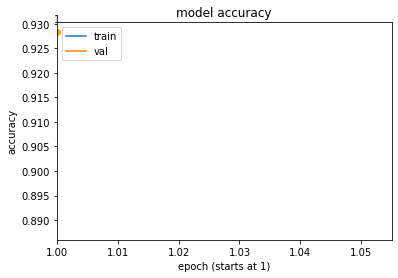

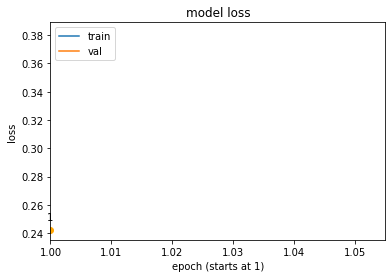

After  second  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  698    0    0    0    0    4   13    1    3    0
1    0  832    3    3    1    0    3    1    6    0
2    6    2  727    9    7    1   10    5   16    1
3    2    1   17  680    0   22    2   13   15    3
4    1    2    4    0  686    0   14    1    4   37
5    8    1    1   17    3  610    6    3   22    5
6    9    3    4    0    9    7  672    0    2    0
7    0   15   20    6    7    0    1  688    0   25
8    7    4    9   10    7   10    7   10  664    3
9    8    6    0   10   17    7    1    5   10  705
CM[9,4]:  17
Run  1 Rep  1 third-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9381333589553833


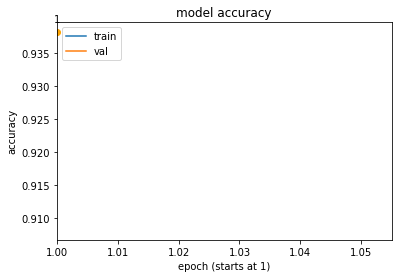

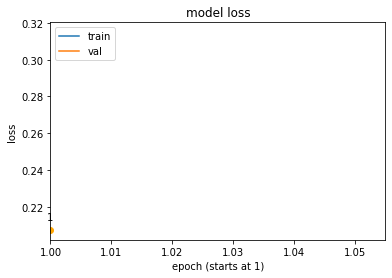

After  third  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  700    0    1    0    0    3   12    1    2    0
1    0  832    3    3    1    0    3    1    6    0
2    3    2  746    6    3    0    7    8    9    0
3    2    1   23  698    0    9    1   13    7    1
4    1    2    5    0  702    0   12    2    4   21
5    6    1    2   17    2  610    8    6   20    4
6    9    3    5    0    5    5  679    0    0    0
7    0   11   20    5    5    0    1  710    1    9
8    4    4   10   12    6    9    6   11  666    3
9   12    5    1   14   21    4    0   11    8  693
CM[9,4]:  21
Run  1 Rep  1 4th-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9426666498184204


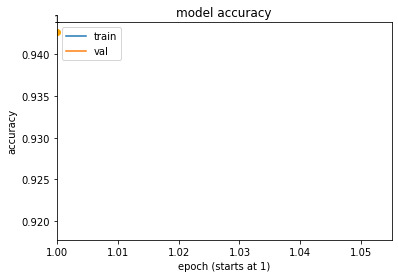

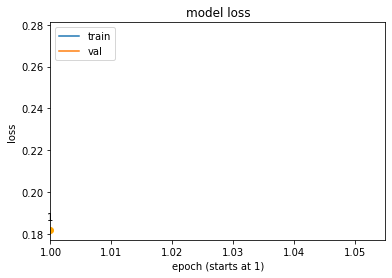

After  4th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  705    0    1    0    0    3    6    2    2    0
1    0  832    4    2    1    1    3    1    5    0
2    5    2  740    6    5    0    6    8   12    0
3    1    1   14  702    0   10    1   12   13    1
4    1    2    2    0  708    0   10    1    2   23
5    6    1    1   10    2  624    7    6   15    4
6   10    3    4    0    7    9  668    1    4    0
7    0    9   16    5    3    0    0  717    0   12
8    5    3    6   13    6   10    4    9  672    3
9   10    5    0   10   20    2    0   10   10  702
CM[9,4]:  20
Run  1 Rep  1 5th-phase training with a  cost_matrix[9, 4] =  1
Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping
Total Epochs:  25
Restored weights at  15 Patience used:  10
Label:  15 Val_Cat_Acc Value:  0.96506667137146


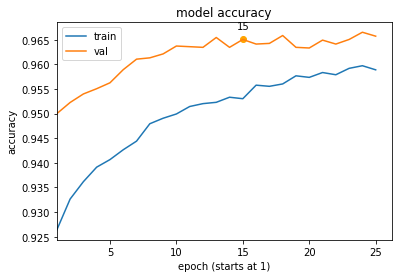

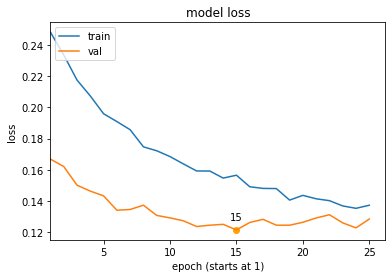

After  5th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  710    0    1    0    0    3    2    1    1    1
1    0  838    3    1    0    1    3    1    2    0
2    5    1  761    2    4    0    2    6    3    0
3    2    0    7  728    0    3    0   10    5    0
4    0    0    3    0  729    0    5    1    1   10
5    3    1    1   14    2  638    3    3    7    4
6    6    2    0    0    5    3  685    0    5    0
7    2    8    7    6    0    0    0  732    0    7
8    7    2    5    5    5    4    3    7  689    4
9    5    5    0    7   14    2    0    6    2  728
CM[9,4]:  14
Run:  1  Rep:  1   complete 

time: 1651
w[9,4]_L_1_1_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_24_1651_.pkl  was saved to Google Drive 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

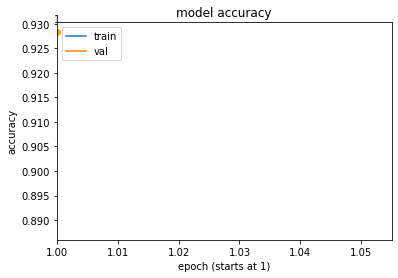

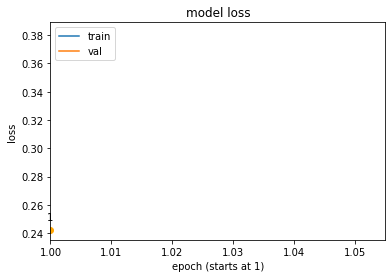

After  second  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  698    0    0    0    0    4   13    1    3    0
1    0  832    3    3    1    0    3    1    6    0
2    6    2  727    9    7    1   10    5   16    1
3    2    1   17  680    0   22    2   13   15    3
4    1    2    4    0  686    0   14    1    4   37
5    8    1    1   17    3  610    6    3   22    5
6    9    3    4    0    9    7  672    0    2    0
7    0   15   20    6    7    0    1  688    0   25
8    7    4    9   10    7   10    7   10  664    3
9    8    6    0   10   17    7    1    5   10  705
CM[9,4]:  17
Run  1 Rep  2 third-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9381333589553833


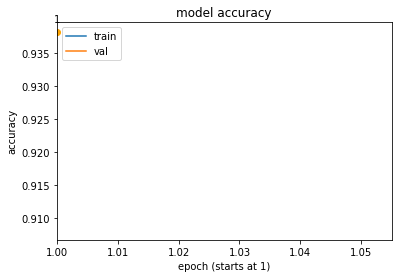

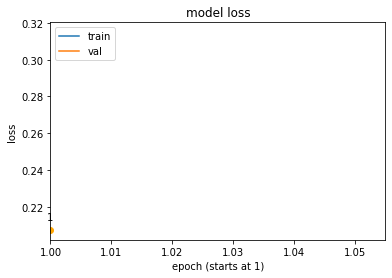

After  third  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  700    0    1    0    0    3   12    1    2    0
1    0  832    3    3    1    0    3    1    6    0
2    3    2  746    6    3    0    7    8    9    0
3    2    1   23  698    0    9    1   13    7    1
4    1    2    5    0  702    0   12    2    4   21
5    6    1    2   17    2  610    8    6   20    4
6    9    3    5    0    5    5  679    0    0    0
7    0   11   20    5    5    0    1  710    1    9
8    4    4   10   12    6    9    6   11  666    3
9   12    5    1   14   21    4    0   11    8  693
CM[9,4]:  21
Run  1 Rep  2 4th-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9426666498184204


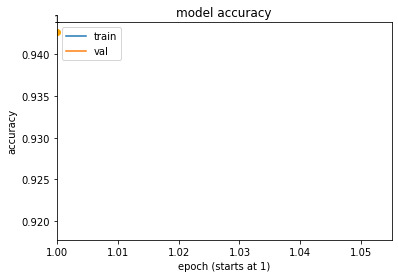

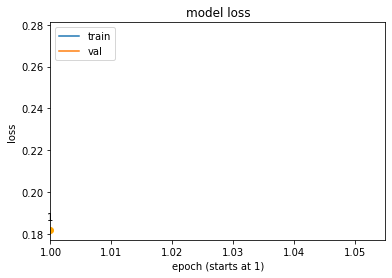

After  4th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  705    0    1    0    0    3    6    2    2    0
1    0  832    4    2    1    1    3    1    5    0
2    5    2  740    6    5    0    6    8   12    0
3    1    1   14  702    0   10    1   12   13    1
4    1    2    2    0  708    0   10    1    2   23
5    6    1    1   10    2  624    7    6   15    4
6   10    3    4    0    7    9  668    1    4    0
7    0    9   16    5    3    0    0  717    0   12
8    5    3    6   13    6   10    4    9  672    3
9   10    5    0   10   20    2    0   10   10  702
CM[9,4]:  20
Run  1 Rep  2 5th-phase training with a  cost_matrix[9, 4] =  1
Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping
Total Epochs:  25
Restored weights at  15 Patience used:  10
Label:  15 Val_Cat_Acc Value:  0.96506667137146


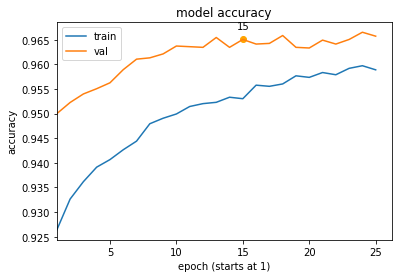

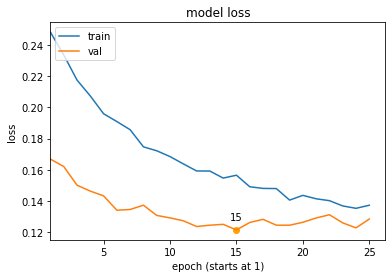

After  5th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  710    0    1    0    0    3    2    1    1    1
1    0  838    3    1    0    1    3    1    2    0
2    5    1  761    2    4    0    2    6    3    0
3    2    0    7  728    0    3    0   10    5    0
4    0    0    3    0  729    0    5    1    1   10
5    3    1    1   14    2  638    3    3    7    4
6    6    2    0    0    5    3  685    0    5    0
7    2    8    7    6    0    0    0  732    0    7
8    7    2    5    5    5    4    3    7  689    4
9    5    5    0    7   14    2    0    6    2  728
CM[9,4]:  14
Run:  1  Rep:  2   complete 

time: 1652
w[9,4]_L_1_1_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_24_1652_.pkl  was saved to Google Drive 
2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

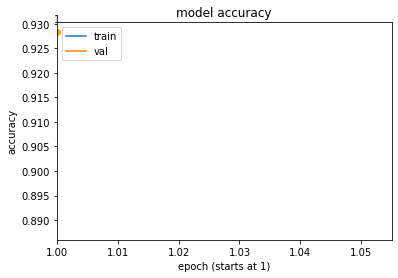

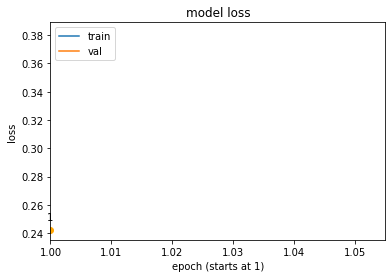

After  second  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  698    0    0    0    0    4   13    1    3    0
1    0  832    3    3    1    0    3    1    6    0
2    6    2  727    9    7    1   10    5   16    1
3    2    1   17  680    0   22    2   13   15    3
4    1    2    4    0  686    0   14    1    4   37
5    8    1    1   17    3  610    6    3   22    5
6    9    3    4    0    9    7  672    0    2    0
7    0   15   20    6    7    0    1  688    0   25
8    7    4    9   10    7   10    7   10  664    3
9    8    6    0   10   17    7    1    5   10  705
CM[9,4]:  17
Run  2 Rep  1 third-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9381333589553833


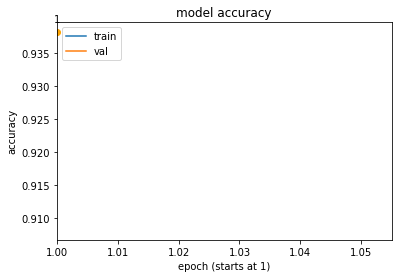

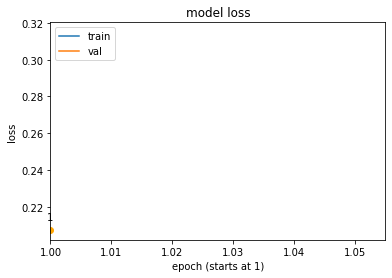

After  third  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  700    0    1    0    0    3   12    1    2    0
1    0  832    3    3    1    0    3    1    6    0
2    3    2  746    6    3    0    7    8    9    0
3    2    1   23  698    0    9    1   13    7    1
4    1    2    5    0  702    0   12    2    4   21
5    6    1    2   17    2  610    8    6   20    4
6    9    3    5    0    5    5  679    0    0    0
7    0   11   20    5    5    0    1  710    1    9
8    4    4   10   12    6    9    6   11  666    3
9   12    5    1   14   21    4    0   11    8  693
CM[9,4]:  21
Run  2 Rep  1 4th-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9426666498184204


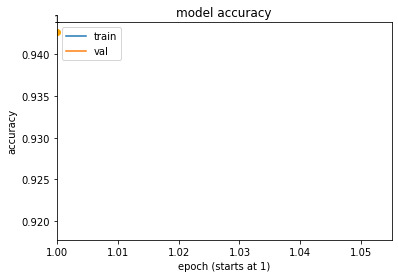

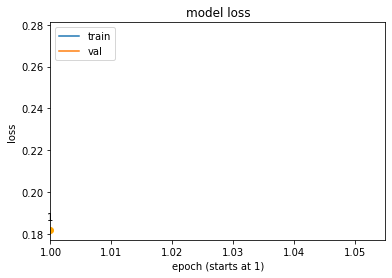

After  4th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  705    0    1    0    0    3    6    2    2    0
1    0  832    4    2    1    1    3    1    5    0
2    5    2  740    6    5    0    6    8   12    0
3    1    1   14  702    0   10    1   12   13    1
4    1    2    2    0  708    0   10    1    2   23
5    6    1    1   10    2  624    7    6   15    4
6   10    3    4    0    7    9  668    1    4    0
7    0    9   16    5    3    0    0  717    0   12
8    5    3    6   13    6   10    4    9  672    3
9   10    5    0   10   20    2    0   10   10  702
CM[9,4]:  20
Run  2 Rep  1 5th-phase training with a  cost_matrix[9, 4] =  1
Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping
Total Epochs:  25
Restored weights at  15 Patience used:  10
Label:  15 Val_Cat_Acc Value:  0.96506667137146


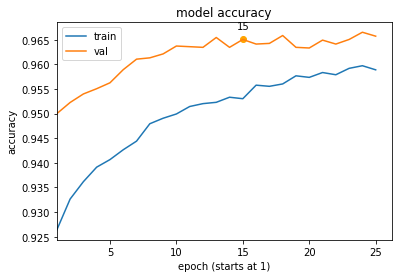

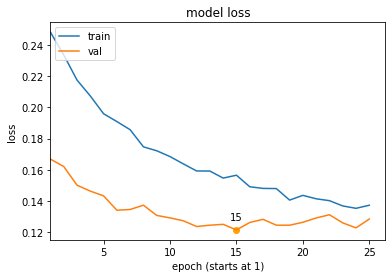

After  5th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  710    0    1    0    0    3    2    1    1    1
1    0  838    3    1    0    1    3    1    2    0
2    5    1  761    2    4    0    2    6    3    0
3    2    0    7  728    0    3    0   10    5    0
4    0    0    3    0  729    0    5    1    1   10
5    3    1    1   14    2  638    3    3    7    4
6    6    2    0    0    5    3  685    0    5    0
7    2    8    7    6    0    0    0  732    0    7
8    7    2    5    5    5    4    3    7  689    4
9    5    5    0    7   14    2    0    6    2  728
CM[9,4]:  14
Run:  2  Rep:  1   complete 

time: 1654
w[9,4]_L_1_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_24_1654_.pkl  was saved to Google Drive 
2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

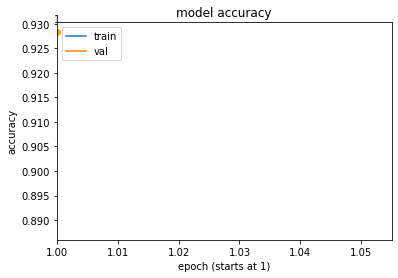

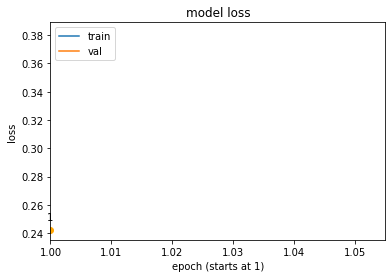

After  second  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  698    0    0    0    0    4   13    1    3    0
1    0  832    3    3    1    0    3    1    6    0
2    6    2  727    9    7    1   10    5   16    1
3    2    1   17  680    0   22    2   13   15    3
4    1    2    4    0  686    0   14    1    4   37
5    8    1    1   17    3  610    6    3   22    5
6    9    3    4    0    9    7  672    0    2    0
7    0   15   20    6    7    0    1  688    0   25
8    7    4    9   10    7   10    7   10  664    3
9    8    6    0   10   17    7    1    5   10  705
CM[9,4]:  17
Run  2 Rep  2 third-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9381333589553833


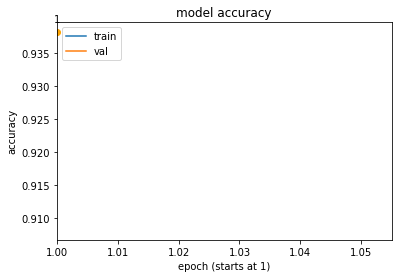

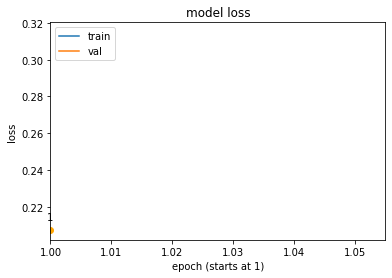

After  third  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  700    0    1    0    0    3   12    1    2    0
1    0  832    3    3    1    0    3    1    6    0
2    3    2  746    6    3    0    7    8    9    0
3    2    1   23  698    0    9    1   13    7    1
4    1    2    5    0  702    0   12    2    4   21
5    6    1    2   17    2  610    8    6   20    4
6    9    3    5    0    5    5  679    0    0    0
7    0   11   20    5    5    0    1  710    1    9
8    4    4   10   12    6    9    6   11  666    3
9   12    5    1   14   21    4    0   11    8  693
CM[9,4]:  21
Run  2 Rep  2 4th-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9426666498184204


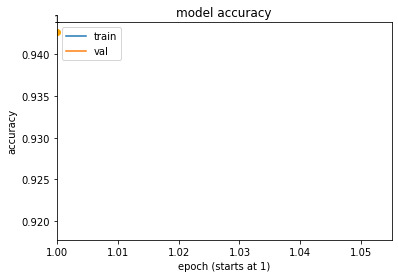

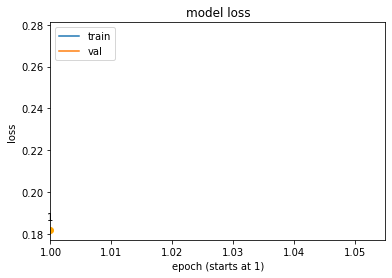

After  4th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  705    0    1    0    0    3    6    2    2    0
1    0  832    4    2    1    1    3    1    5    0
2    5    2  740    6    5    0    6    8   12    0
3    1    1   14  702    0   10    1   12   13    1
4    1    2    2    0  708    0   10    1    2   23
5    6    1    1   10    2  624    7    6   15    4
6   10    3    4    0    7    9  668    1    4    0
7    0    9   16    5    3    0    0  717    0   12
8    5    3    6   13    6   10    4    9  672    3
9   10    5    0   10   20    2    0   10   10  702
CM[9,4]:  20
Run  2 Rep  2 5th-phase training with a  cost_matrix[9, 4] =  1
Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping
Total Epochs:  25
Restored weights at  15 Patience used:  10
Label:  15 Val_Cat_Acc Value:  0.96506667137146


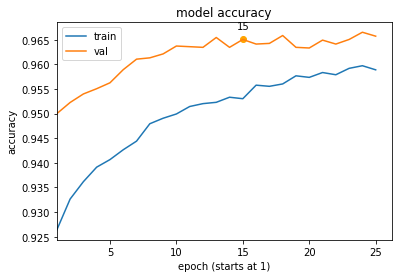

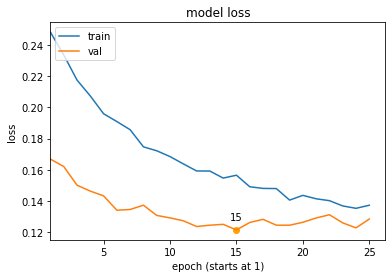

After  5th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  710    0    1    0    0    3    2    1    1    1
1    0  838    3    1    0    1    3    1    2    0
2    5    1  761    2    4    0    2    6    3    0
3    2    0    7  728    0    3    0   10    5    0
4    0    0    3    0  729    0    5    1    1   10
5    3    1    1   14    2  638    3    3    7    4
6    6    2    0    0    5    3  685    0    5    0
7    2    8    7    6    0    0    0  732    0    7
8    7    2    5    5    5    4    3    7  689    4
9    5    5    0    7   14    2    0    6    2  728
CM[9,4]:  14
Run:  2  Rep:  2   complete 

time: 1655
w[9,4]_L_1_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_24_1655_.pkl  was saved to Google Drive 
3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

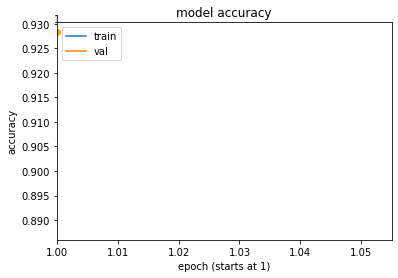

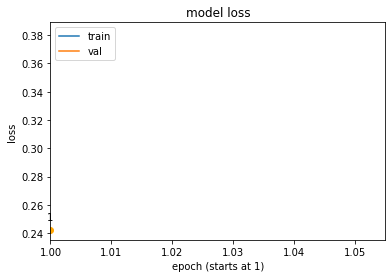

After  second  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  698    0    0    0    0    4   13    1    3    0
1    0  832    3    3    1    0    3    1    6    0
2    6    2  727    9    7    1   10    5   16    1
3    2    1   17  680    0   22    2   13   15    3
4    1    2    4    0  686    0   14    1    4   37
5    8    1    1   17    3  610    6    3   22    5
6    9    3    4    0    9    7  672    0    2    0
7    0   15   20    6    7    0    1  688    0   25
8    7    4    9   10    7   10    7   10  664    3
9    8    6    0   10   17    7    1    5   10  705
CM[9,4]:  17
Run  3 Rep  1 third-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9381333589553833


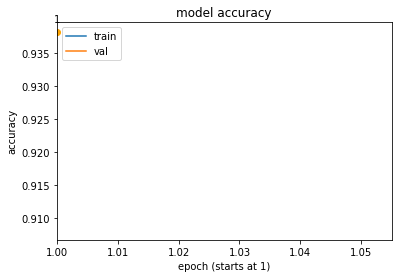

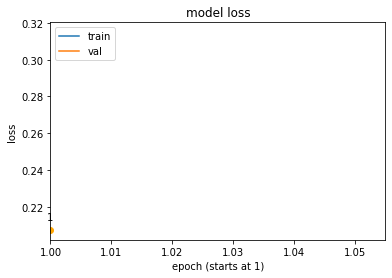

After  third  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  700    0    1    0    0    3   12    1    2    0
1    0  832    3    3    1    0    3    1    6    0
2    3    2  746    6    3    0    7    8    9    0
3    2    1   23  698    0    9    1   13    7    1
4    1    2    5    0  702    0   12    2    4   21
5    6    1    2   17    2  610    8    6   20    4
6    9    3    5    0    5    5  679    0    0    0
7    0   11   20    5    5    0    1  710    1    9
8    4    4   10   12    6    9    6   11  666    3
9   12    5    1   14   21    4    0   11    8  693
CM[9,4]:  21
Run  3 Rep  1 4th-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9426666498184204


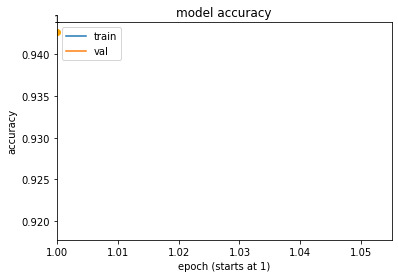

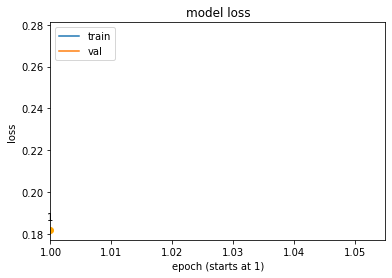

After  4th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  705    0    1    0    0    3    6    2    2    0
1    0  832    4    2    1    1    3    1    5    0
2    5    2  740    6    5    0    6    8   12    0
3    1    1   14  702    0   10    1   12   13    1
4    1    2    2    0  708    0   10    1    2   23
5    6    1    1   10    2  624    7    6   15    4
6   10    3    4    0    7    9  668    1    4    0
7    0    9   16    5    3    0    0  717    0   12
8    5    3    6   13    6   10    4    9  672    3
9   10    5    0   10   20    2    0   10   10  702
CM[9,4]:  20
Run  3 Rep  1 5th-phase training with a  cost_matrix[9, 4] =  1
Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping
Total Epochs:  25
Restored weights at  15 Patience used:  10
Label:  15 Val_Cat_Acc Value:  0.96506667137146


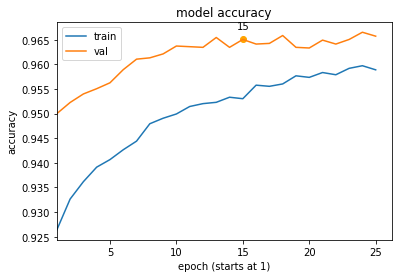

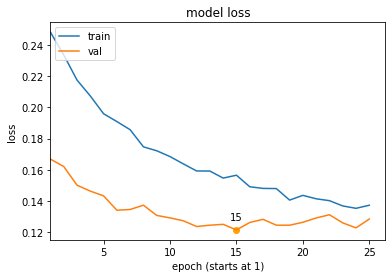

After  5th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  710    0    1    0    0    3    2    1    1    1
1    0  838    3    1    0    1    3    1    2    0
2    5    1  761    2    4    0    2    6    3    0
3    2    0    7  728    0    3    0   10    5    0
4    0    0    3    0  729    0    5    1    1   10
5    3    1    1   14    2  638    3    3    7    4
6    6    2    0    0    5    3  685    0    5    0
7    2    8    7    6    0    0    0  732    0    7
8    7    2    5    5    5    4    3    7  689    4
9    5    5    0    7   14    2    0    6    2  728
CM[9,4]:  14
Run:  3  Rep:  1   complete 

time: 1657
w[9,4]_L_1_200_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_24_1657_.pkl  was saved to Google Drive 
3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

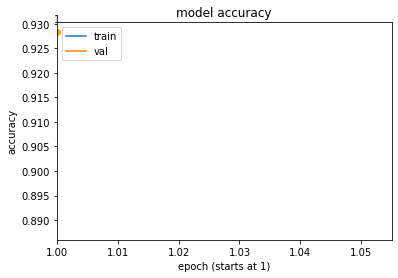

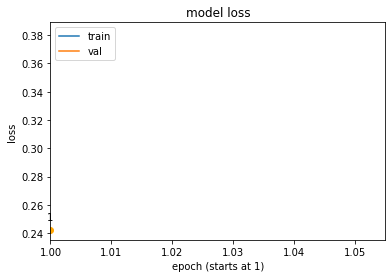

After  second  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  698    0    0    0    0    4   13    1    3    0
1    0  832    3    3    1    0    3    1    6    0
2    6    2  727    9    7    1   10    5   16    1
3    2    1   17  680    0   22    2   13   15    3
4    1    2    4    0  686    0   14    1    4   37
5    8    1    1   17    3  610    6    3   22    5
6    9    3    4    0    9    7  672    0    2    0
7    0   15   20    6    7    0    1  688    0   25
8    7    4    9   10    7   10    7   10  664    3
9    8    6    0   10   17    7    1    5   10  705
CM[9,4]:  17
Run  3 Rep  2 third-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9381333589553833


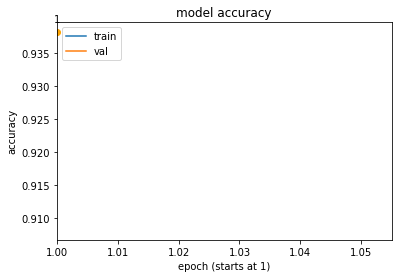

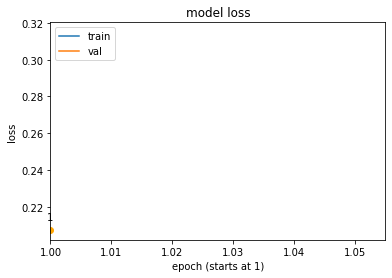

After  third  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  700    0    1    0    0    3   12    1    2    0
1    0  832    3    3    1    0    3    1    6    0
2    3    2  746    6    3    0    7    8    9    0
3    2    1   23  698    0    9    1   13    7    1
4    1    2    5    0  702    0   12    2    4   21
5    6    1    2   17    2  610    8    6   20    4
6    9    3    5    0    5    5  679    0    0    0
7    0   11   20    5    5    0    1  710    1    9
8    4    4   10   12    6    9    6   11  666    3
9   12    5    1   14   21    4    0   11    8  693
CM[9,4]:  21
Run  3 Rep  2 4th-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9426666498184204


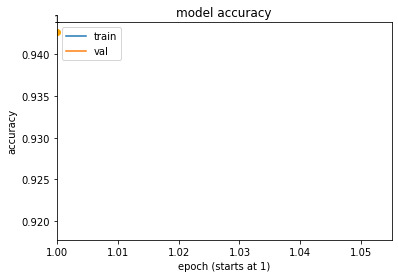

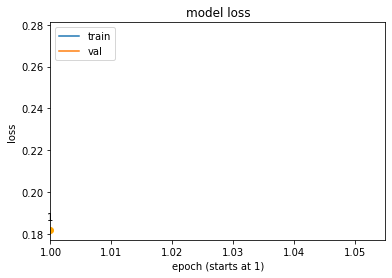

After  4th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  705    0    1    0    0    3    6    2    2    0
1    0  832    4    2    1    1    3    1    5    0
2    5    2  740    6    5    0    6    8   12    0
3    1    1   14  702    0   10    1   12   13    1
4    1    2    2    0  708    0   10    1    2   23
5    6    1    1   10    2  624    7    6   15    4
6   10    3    4    0    7    9  668    1    4    0
7    0    9   16    5    3    0    0  717    0   12
8    5    3    6   13    6   10    4    9  672    3
9   10    5    0   10   20    2    0   10   10  702
CM[9,4]:  20
Run  3 Rep  2 5th-phase training with a  cost_matrix[9, 4] =  1
Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping
Total Epochs:  25
Restored weights at  15 Patience used:  10
Label:  15 Val_Cat_Acc Value:  0.96506667137146


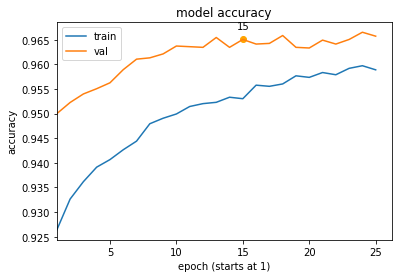

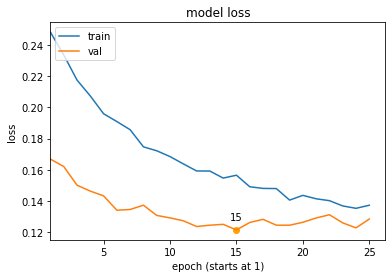

After  5th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  710    0    1    0    0    3    2    1    1    1
1    0  838    3    1    0    1    3    1    2    0
2    5    1  761    2    4    0    2    6    3    0
3    2    0    7  728    0    3    0   10    5    0
4    0    0    3    0  729    0    5    1    1   10
5    3    1    1   14    2  638    3    3    7    4
6    6    2    0    0    5    3  685    0    5    0
7    2    8    7    6    0    0    0  732    0    7
8    7    2    5    5    5    4    3    7  689    4
9    5    5    0    7   14    2    0    6    2  728
CM[9,4]:  14
Run:  3  Rep:  2   complete 

time: 1659
w[9,4]_L_1_200_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_24_1659_.pkl  was saved to Google Drive 
4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

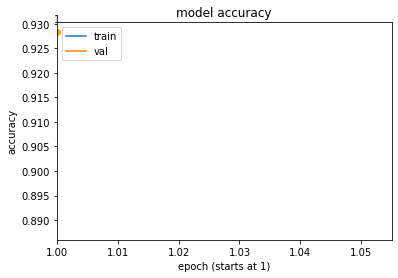

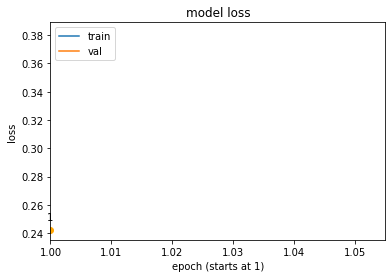

After  second  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  698    0    0    0    0    4   13    1    3    0
1    0  832    3    3    1    0    3    1    6    0
2    6    2  727    9    7    1   10    5   16    1
3    2    1   17  680    0   22    2   13   15    3
4    1    2    4    0  686    0   14    1    4   37
5    8    1    1   17    3  610    6    3   22    5
6    9    3    4    0    9    7  672    0    2    0
7    0   15   20    6    7    0    1  688    0   25
8    7    4    9   10    7   10    7   10  664    3
9    8    6    0   10   17    7    1    5   10  705
CM[9,4]:  17
Run  4 Rep  1 third-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9381333589553833


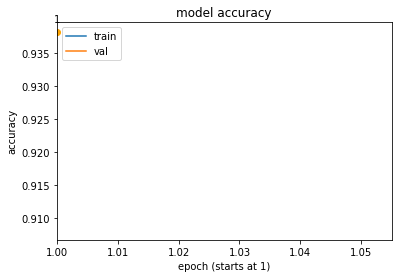

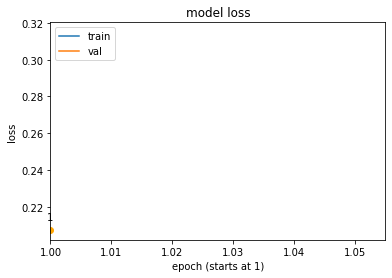

After  third  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  700    0    1    0    0    3   12    1    2    0
1    0  832    3    3    1    0    3    1    6    0
2    3    2  746    6    3    0    7    8    9    0
3    2    1   23  698    0    9    1   13    7    1
4    1    2    5    0  702    0   12    2    4   21
5    6    1    2   17    2  610    8    6   20    4
6    9    3    5    0    5    5  679    0    0    0
7    0   11   20    5    5    0    1  710    1    9
8    4    4   10   12    6    9    6   11  666    3
9   12    5    1   14   21    4    0   11    8  693
CM[9,4]:  21
Run  4 Rep  1 4th-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9426666498184204


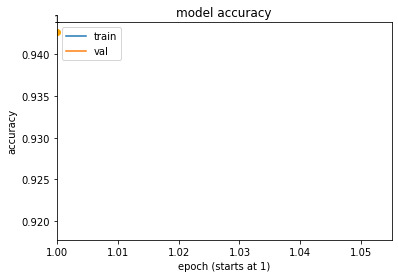

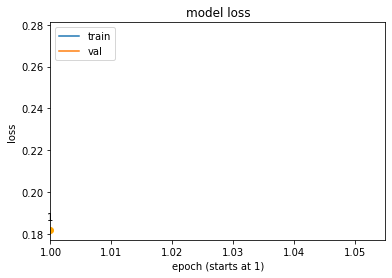

After  4th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  705    0    1    0    0    3    6    2    2    0
1    0  832    4    2    1    1    3    1    5    0
2    5    2  740    6    5    0    6    8   12    0
3    1    1   14  702    0   10    1   12   13    1
4    1    2    2    0  708    0   10    1    2   23
5    6    1    1   10    2  624    7    6   15    4
6   10    3    4    0    7    9  668    1    4    0
7    0    9   16    5    3    0    0  717    0   12
8    5    3    6   13    6   10    4    9  672    3
9   10    5    0   10   20    2    0   10   10  702
CM[9,4]:  20
Run  4 Rep  1 5th-phase training with a  cost_matrix[9, 4] =  1
Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping
Total Epochs:  25
Restored weights at  15 Patience used:  10
Label:  15 Val_Cat_Acc Value:  0.96506667137146


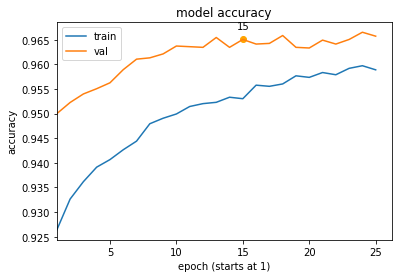

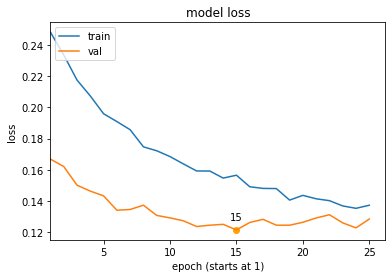

After  5th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  710    0    1    0    0    3    2    1    1    1
1    0  838    3    1    0    1    3    1    2    0
2    5    1  761    2    4    0    2    6    3    0
3    2    0    7  728    0    3    0   10    5    0
4    0    0    3    0  729    0    5    1    1   10
5    3    1    1   14    2  638    3    3    7    4
6    6    2    0    0    5    3  685    0    5    0
7    2    8    7    6    0    0    0  732    0    7
8    7    2    5    5    5    4    3    7  689    4
9    5    5    0    7   14    2    0    6    2  728
CM[9,4]:  14
Run:  4  Rep:  1   complete 

time: 1700
w[9,4]_L_1_500_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_24_1700_.pkl  was saved to Google Drive 
4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

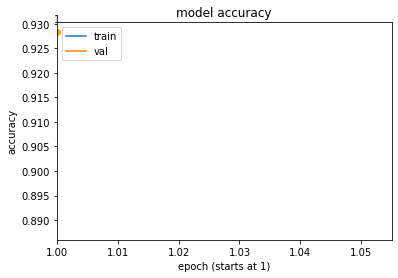

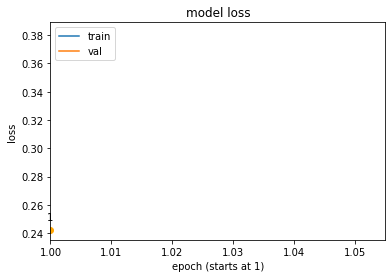

After  second  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  698    0    0    0    0    4   13    1    3    0
1    0  832    3    3    1    0    3    1    6    0
2    6    2  727    9    7    1   10    5   16    1
3    2    1   17  680    0   22    2   13   15    3
4    1    2    4    0  686    0   14    1    4   37
5    8    1    1   17    3  610    6    3   22    5
6    9    3    4    0    9    7  672    0    2    0
7    0   15   20    6    7    0    1  688    0   25
8    7    4    9   10    7   10    7   10  664    3
9    8    6    0   10   17    7    1    5   10  705
CM[9,4]:  17
Run  4 Rep  2 third-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9381333589553833


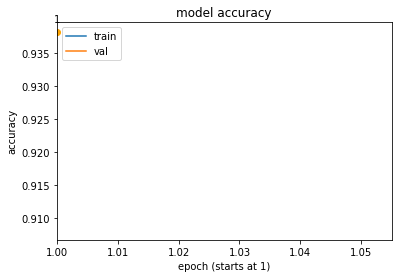

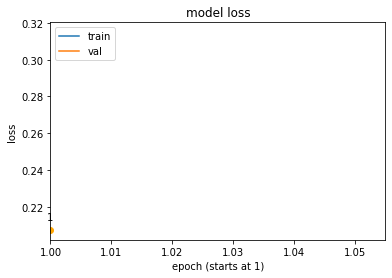

After  third  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  700    0    1    0    0    3   12    1    2    0
1    0  832    3    3    1    0    3    1    6    0
2    3    2  746    6    3    0    7    8    9    0
3    2    1   23  698    0    9    1   13    7    1
4    1    2    5    0  702    0   12    2    4   21
5    6    1    2   17    2  610    8    6   20    4
6    9    3    5    0    5    5  679    0    0    0
7    0   11   20    5    5    0    1  710    1    9
8    4    4   10   12    6    9    6   11  666    3
9   12    5    1   14   21    4    0   11    8  693
CM[9,4]:  21
Run  4 Rep  2 4th-phase training with a  cost_matrix[9, 4] =  1
Total Epochs:  1
Restored weights at  1 Patience used:  0
Label:  1 Val_Cat_Acc Value:  0.9426666498184204


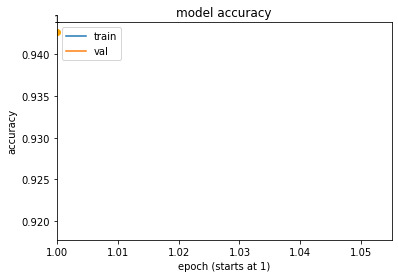

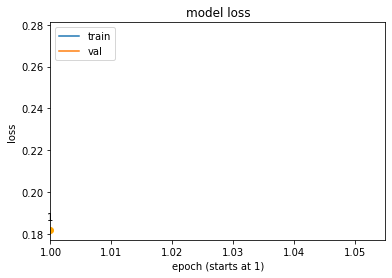

After  4th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  705    0    1    0    0    3    6    2    2    0
1    0  832    4    2    1    1    3    1    5    0
2    5    2  740    6    5    0    6    8   12    0
3    1    1   14  702    0   10    1   12   13    1
4    1    2    2    0  708    0   10    1    2   23
5    6    1    1   10    2  624    7    6   15    4
6   10    3    4    0    7    9  668    1    4    0
7    0    9   16    5    3    0    0  717    0   12
8    5    3    6   13    6   10    4    9  672    3
9   10    5    0   10   20    2    0   10   10  702
CM[9,4]:  20
Run  4 Rep  2 5th-phase training with a  cost_matrix[9, 4] =  1
Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping
Total Epochs:  25
Restored weights at  15 Patience used:  10
Label:  15 Val_Cat_Acc Value:  0.96506667137146


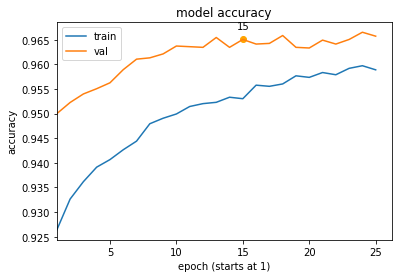

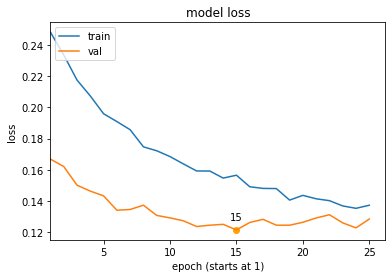

After  5th  stage CM: 
      0    1    2    3    4    5    6    7    8    9
0  710    0    1    0    0    3    2    1    1    1
1    0  838    3    1    0    1    3    1    2    0
2    5    1  761    2    4    0    2    6    3    0
3    2    0    7  728    0    3    0   10    5    0
4    0    0    3    0  729    0    5    1    1   10
5    3    1    1   14    2  638    3    3    7    4
6    6    2    0    0    5    3  685    0    5    0
7    2    8    7    6    0    0    0  732    0    7
8    7    2    5    5    5    4    3    7  689    4
9    5    5    0    7   14    2    0    6    2  728
CM[9,4]:  14
Run:  4  Rep:  2   complete 

time: 1701
w[9,4]_L_1_500_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_24_1701_.pkl  was saved to Google Drive 


In [29]:
#@title
# cm = np.zeros([10,10])
# combined_cms = np.empty((1,100))
count = 0
run = 0
rep = 0
total_reps = 2
admin_dictionary = {} 


for i in [1]: #lambda1
  for j in [1, 100, 200, 500, 1000]:  #lambda2
    for k in   [1 ]: #lambda3
      for l in   [1]: #lambda4
        # for m in   [1, 10, 100, 500]: #lambda5
        for m in   [1]: #lambda5
    
          run+=1

          for rep in range(1,total_reps+1):
            count+=1
            lambda1 = i
            lambda2 = j
            lambda3 = k
            lambda4 = l
            lambda5 = m

            # ### Number of Epochs for each Stage of Training
            train_epochs1, train_epochs2, train_epochs3, train_epochs4, train_epochs5 = 1,1,1,1, 50

            # ### Whether there is EarlyStopping and if so how many Epochs of Patience Patience=0 means no EarlyStopping
            es1, es2, es3, es4, es5 = 0, 0, 0,0, 10

            # ### String of weights-of-misclassification for naming files
            ## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
            cost_str = str(lambda1) + "_" + str(lambda2) + "_"  + str(lambda3) + "_" + str(lambda4) + "_" + str(lambda5)
            epochs_str = str(train_epochs1) + "_" + str(train_epochs2) + "_"  + str(train_epochs3)  + "_"  + str(train_epochs4)  + "_"  + str(train_epochs5)
            patience_str = str(es1) + "_" + str(es2) + "_"  + str(es3) + "_"  + str(es4) + "_"  + str(es5)
            # ## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
            
            # ### Admin Dictionary to Save with Each File/Run
            admin_dictionary[run, rep] = {"count": count, "run": run, "rep":  rep, 
                                "lambda1":lambda1,
                                "lambda2":lambda2,
                                "lambda3":lambda3,
                                "lambda4":lambda4,
                                "lambda5":lambda5,

                                "epochs1": train_epochs1,
                                "epochs2": train_epochs2,
                                "epochs3": train_epochs3,
                                "epochs4": train_epochs4,
                                "epochs5": train_epochs5,
                                
                                "es1":    es1,
                                "es2":    es2,
                                "es3":    es3,
                                "es4":    es4,
                                "es5":    es5,

                                "tf.keras.utils.set_random_seed": seed,
                                "OS environment python hash seed value": seed_value,

                                }


    
            ### File Extension to reference in JMP : weights_method_costs1_2_3
            ## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            file_extension = "w[9,4]_L_" + cost_str + "_E_" + epochs_str + "_P_" + patience_str + "_"
            ## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            # print(len(file_extension))


            np.set_printoptions(suppress=True)
            np.set_printoptions(precision=2)

            # print("Last run using ", cost_str, "File Extension ", file_extension)
            # print(f'{run} '*500)
            # print(f"Count:{count}--Run:{run}--Rep:{rep}|Lambdas {i}, {j},{k},{l},{m} | Epochs: 1,1,1,1,50 (es5= 10) | ")
            # print(f'{run} '*500)

            combined_history_dictionary = {}  #because there will be a unknown number of epochs a dictionary is probly a better fit
            combined_cms       = {}



            def display_cm_after_training(training, cm):
              # print("After ", str(training), " stage CM: \n", cm)
              # print("CM[9,4]: ", cm[4][9]) #yes this is the right format dont change! [First Value is the Column][Second Value is the Row]
    

            # Initial Training _________________________________________________________
            cm1, history1, model1, restored_weights1 =  PA_method_epoch(None, lambda1, nb_epoch=train_epochs1, patience=es1 )    #Individual CM, and Training/Validation History
            # plot_fx(history1, restored_weights1)
            # display_cm_after_training("first", cm1)

            # Second Phase Training ______________________________________________________
            print("Run ", run, "Rep ", rep, "second-phase training with a  cost_matrix[9, 4] = ",  lambda2)
            cm2, history2, model2, restored_weights2 =  PA_method_epoch(model1, lambda2, nb_epoch=train_epochs2, patience=es2 )    #Individual CM, and Training/Validation History
            # plot_fx(history2, restored_weights2)
            # display_cm_after_training("second", cm2)

            
            # Third Phase Training ____________________________________________________________
            print("Run ", run, "Rep ",rep, "third-phase training with a  cost_matrix[9, 4] = ",  lambda3)
            cm3, history3, model3, restored_weights3 =  PA_method_epoch(model2, lambda3, nb_epoch=train_epochs3, patience=es3 )    #Individual CM, and Training/Validation History
            # plot_fx(history3, restored_weights3)
            # display_cm_after_training("third", cm3)
            
            
            # 4th Phase Training ____________________________________________________________
            print("Run ", run, "Rep ",rep, "4th-phase training with a  cost_matrix[9, 4] = ",  lambda4)
            cm4, history4, model4, restored_weights4 =  PA_method_epoch(model3, lambda4, nb_epoch=train_epochs4, patience=es4 )    #Individual CM, and Training/Validation History
            # plot_fx(history4, restored_weights4)
            # display_cm_after_training("4th", cm4)
            
                        
            # 5th Phase Training ____________________________________________________________
            print("Run ", run, "Rep ",rep, "5th-phase training with a  cost_matrix[9, 4] = ",  lambda5)
            cm5, history5, model5, restored_weights5 =  PA_method_epoch(model4, lambda5, nb_epoch=train_epochs5, patience=es5 )    #Individual CM, and Training/Validation History
            # plot_fx(history5, restored_weights5)
            # display_cm_after_training("5th", cm5)
            

            # # Save the results of 1st thru 5th phase training in one combined_history_list or disctionary
            #   combined_history_dictionary[run, i] = {"First": history1, "Second": history2, "Third": history3}
            #   combined_history_list.extend((history1, history2, history3))
            cm1_array = np.asarray(cm1)  #Indiv CM as array for storing
            cm2_array = np.asarray(cm2)
            cm3_array = np.asarray(cm3)
            cm4_array = np.asarray(cm4)
            cm5_array = np.asarray(cm5)

            # This results in saving the three confusion matrices after the three stages of training
            # The shape of the combined Cms will be 1x300 so that all can be saved on one-row
          
            cms = np.vstack((cm1_array.reshape((1,100)),
                                      cm2_array.reshape((1,100)),
                                      cm3_array.reshape((1,100)), 
                             cm4_array.reshape((1,100)),
                             cm5_array.reshape((1,100)))
                                    )
            

            combined_history_4 = plot_5_fx(history1, history2, history3, history4, history5,
                                           restored_weights1, restored_weights2, restored_weights3, restored_weights4, restored_weights5)
            
            combined_history_dictionary[run, rep] = {"First": history1, "Second": history2, "Third": history3, 
                                                     "Fourth": history4, "Fifth": history5,
                                                     'Combined': combined_history_4, 
                                                     '3ConfusionMatrices': cms, 'admin': admin_dictionary[run,rep]}
            
            combined_cms[run, rep] = cms

            print("Run: ", run, " Rep: ", rep, "  complete \n")

            #Need to delete the model inside the history or else it won't pickle            
            # To access the dictionary history values for all three stages of training:
            for phase2 in ["First", "Second", "Third", "Fourth" , "Fifth"]:
                # print(combined_history_dictionary[run,rep][i].history.keys())
                del combined_history_dictionary[run,rep][phase2].model #https://github.com/keras-team/keras/issues/646 from FChollet


            import pickle



            from datetime import date
            from datetime import datetime
            today = date.today()
            file_date = today.strftime("%Y_%m_%d")
            now = datetime.now() # current date and time
            file_time = now.strftime("%H%M")
            print("time:", file_time)
            # str_reps = str(rep)
            # str_runs = str(run)


            file_name =  file_extension + "_" + file_date + "_" + file_time +  "_.pkl"
            # print(file_name, " will be saved with ", combined_cms.shape)

            with open(path + file_name, 'wb') as handle:
                  
                # A new file will be created
                pickle.dump(combined_history_dictionary, handle,  protocol=pickle.HIGHEST_PROTOCOL)
                print(file_name, " was saved to Google Drive ")

            #The following code only works if its saved in colab. I'm saving to MyDrive
            # from google.colab import files
            # files.download( file_name )  

            # print(file_name, " was saved to Downloads ")




# 

In [13]:
# How many categories are there in the test set?

truth_num_per_category = Y_val.sum(axis=0)
print(truth_num_per_category)

[719. 849. 784. 755. 749. 676. 706. 762. 731. 769.]


Load Results

I have a lot of pickle files.  Let's see if I can load them all up and put in a csv format.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Con3"

path = "/content/drive/MyDrive/Con3/"

file_name = "delete_later.pkl"

import pickle 

import os

dir = path

dict_of_run_files = {}

count = 0
for file in os.listdir(path):
  if file.endswith(".pkl") and file.startswith("w[9,4]"):
    # myfunction(file)
    with open(path + file, 'rb') as handle:
    # Call load method to deserialze
      dict_of_run_files[file] = pickle.load(handle)
      # list_of_files.extend(value for name, value in sorted(os.listdir(path)).items(), key=lambda item: item[0]) if name.startswith('run')
      count+=1 
      # print(unpickled_object == variable_to_be_deleted)
      print(count, ". ", file, " was saved to dict_of_run_files. ")

      

 5Lambdas1stPhase
 delete_later.pkl
 PreExperiment_PA_Shfl_40D_Lambda1_Lambda2_Lambda3
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1720_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1721_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1722_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1723_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1725_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_22_1257_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_22_1259_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_22_1300_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_22_1302_.pkl'
'w[9,4]_L_1000_100_1_1_1_E_1_1_1_1_50_P_0_0_0_0_10__2023_03_22_1304_.pkl'
'w[9,4]_L_1000_10_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1707_.pkl'
'w[9,4]_L_1000_10_1_1_1_E_1_1_1_1_25_P_0_0_0_0_10__2023_03_21_1709_.pkl'
'w[9,4]_L_1000_10_1_1_1_E_1

How to get into the "dict_of_run_files" variable and dig out each of the contents we need in each pickle file.

We need at least the following information in a dataframe:

UniqueID | Date_Time |  Run | Rep | Lambda = (i,j,k) | Epochs = (E1, E2, E3) | EarlyStop Patience = (P1, P2, P3) | Train/Val Accuracy | # of Misclassifications of [9t, 4p] | # Reverse Misclassifications | Final CM | Seed1 | Seed2 
-- | -- | --| --| --| --| --| --| -- | --| --| --| --
int | string | int | int | tuple | tuple | tuple | float | int | int | (1,100) (1,100), (1,100) | int | int





In [16]:
# column_name_list = ["UniqueID" , "Date_Time" ,  "Run" , "Rep" , "Lambda = (i,j,k)" , "Epochs = (E1, E2, E3)" , "EarlyStop Patience = (P1, P2, P3)" , "Val Accuracy" , "# of Misclassifications of [9t, 4p]" , "# Reverse Misclassifications" ,"Final CM", "Seed1" , "Seed2" ]


Unique ID can come later from just the order of the index or the key-name-of the file since each one has a unique last file_name.

Date_Time can come from the last part of the file name string, although in hind sight would have been nice to save to the admin key

Run really can't be a trusted Run Number anymore since I had some trouble with it, but can be cleaned up based off the lambda-epochs-patience values.

Rep is Rep specified in the Dictionary.



In [17]:
# dict_of_run_files.keys()
# An example of a key is 'run1_rep_1_w[9,4]_L_1_1_1_E_5_5_25_P_0_0_25__2023_03_09_1329_.pkl'

#I later had the great idea of adding an admin file so some files have it some don't.
# #This one doesn't.
# try:
#   dict_of_run_files['run1_rep_1_w[9,4]_L_1_1_1_E_5_5_25_P_0_0_25__2023_03_09_1329_.pkl'][(1,1)]['admin']
  

# # print("Run:" , dict_of_run_files['run23_rep_1_w[9,4]_L_100_1_100_E_5_5_25_P_0_0_0__2023_03_09_1434_.pkl'][(23,1)]['admin']['run'])
# print("Rep:" , dict_of_run_files['run23_rep_1_w[9,4]_L_100_1_100_E_5_5_25_P_0_0_0__2023_03_09_1434_.pkl'][(23,1)]['admin']['rep'])


In [18]:
# dict(list_of_files[0]).values()

In [19]:
#Save a file to myDrive/con3

# Analyze 

\\


In [20]:
import numpy as np
# import pandas as pd
# empty_cm = np.zeros((10,10))  
# empty_cm=pd.DataFrame(empty_cm)

# empty_cm.columns = ['0p', '1p', '2p', '3p', '4p', '5p', '6p', '7p', '8p', '9p']
# empty_cm.index = ['0t', '1t', '2t', '3t', '4t', '5t', '6t', '7t', '8t', '9t']

# # print(myvar_cm_average)

# empty_cm_array = np.asarray(empty_cm)
# empty_cm_array_1_100 = np.reshape(empty_cm_array,(1,100))
# # print(cm_average_array)

# df = empty_cm
# df_new = pd.DataFrame(empty_cm_array_1_100,  columns=pd.MultiIndex.from_product([ df.index,df.columns]))
# df_new.columns.to_flat_index()
# df_new.columns   = ['_'.join(col) for col in df_new.columns.values]

# # Now convert combined_cms of size 30x100 to a panda dataframe
# cms_df = pd.DataFrame(combined_cms, columns=[df_new.columns], index=["First", "Second", "Third"])

# cms_df

# for run in runs:
#   for rep in reps:
#     for phase in phases:
#       pd.DataFrame(combined_history_dictionary[run,rep]["3ConfusionMatrices"], columns=[df_new.columns], index=["First", "Second", "Third"])

In [21]:
# combined_cms[0,]

In [22]:
# combined_cms_df["9t_4p"]

In [23]:
# np.average(combined_cms_df["9t_4p"])

In [24]:
# csv_filename = file_name[:-4] + ".csv"

# combined_cms_df.to_csv(csv_filename)
# # 

# from google.colab import files
# files.download(csv_filename )

# print("Downloading ", csv_filename , " of shape ", combined_cms_df.shape)

In [25]:
# df = pd.DataFrame(sum(var)/len(var), columns=["Values"]) 
# # print(df)

# df.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# (df.sort_values(by="Values", ascending=False)[0:20])


# df_sorted = df.sort_values(by="Values", ascending=False)[10:]  #the top 10 are usually diagonal


# df_sorted.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# import math

# print("On average...")
# print("Num 1 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[0])/10), " as a ", df_sorted["Values"].index[0]%10, "  (", (df_sorted["Values"].values[0]), " times)" )
# print("Num 2 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[1])/10), " as a ", df_sorted["Values"].index[1]%10, "  (", (df_sorted["Values"].values[1]), " times)" )
# print("Num 3 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[2])/10), " as a ", df_sorted["Values"].index[2]%10, "  (", (df_sorted["Values"].values[2]), " times)" )




In [26]:
# df_percents = pd.DataFrame( ((sum(var)*100/len(var)).reshape((10,10))/truth_num_per_category).reshape((100)), columns = ["Values"])


# df_sorted_percents = df_percents.sort_values(by="Values", ascending=False)[10:]  #the top 10 are usually diagonal

# df_sorted_percents.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# print("On average .. ")
# print("Num 1 percent misclassifications", math.floor((df_sorted_percents["Values"].index[0])/10), " as ", df_sorted_percents["Values"].index[0]%10, (df_sorted_percents["Values"].values[0]), " percent" )
# print("Num 2 percent misclassifications", math.floor((df_sorted_percents["Values"].index[1])/10), " as ", df_sorted_percents["Values"].index[1]%10,  (df_sorted_percents["Values"].values[1]), " percent" )
# print("Num 3 percent misclassifications", math.floor((df_sorted_percents["Values"].index[2])/10), " as ", df_sorted_percents["Values"].index[2]%10, (df_sorted_percents["Values"].values[2]), " percent" )






# Extraneous

#### To reference later: 

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/structured_data/imbalanced_data.ipynb#scrollTo=UJ589fn8ST3x

To train a model with class weights:

```
class_weight = {0: weight_for_0, 1: weight_for_1}

weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),

    # The class weights go here
    class_weight=class_weight)
```



##### extra

In [27]:
# Extraneous information I am not using at the moment

# model.compile(
#      optimizer='adam',
#      loss=WeightedCategoricalCrossentropy(cost_matrix)
#      )

## Model Saving

# model.save(save_version_dir,save_format='tf')

## Model Loading

# model = tf.keras.models.load_model(
#     save_version_dir,
#     compile=True,
#     custom_objects={
#         'WeightedCategoricalCrossentropy': WeightedCategoricalCrossentropy(cost_matrix)
#         }
#     )
 

#### Experimental Runs 

starting to think about how i would shape the initial, middle and late training experiments.  

In [28]:
count = 0
run = 0
rep = 0

print("     | --- Init --- | | --- Mid --- | | --- Late --- | ")
for i in ["   1"," 100", "1000"]: #lambda1
  
  for j in  ["   1"," 100", "1000"]:  #lambda2
    for k in   ["   1"," 100", "1000"]: #lambda3
      run+=1
      for rep in range(1,2+1):
        count+=1
        print(f"{count}--{run}--{rep}    |     {i}     ,     {j}    ,    {k}     | ")
        



     | --- Init --- | | --- Mid --- | | --- Late --- | 
1--1--1    |        1     ,        1    ,       1     | 
2--1--2    |        1     ,        1    ,       1     | 
3--2--1    |        1     ,        1    ,     100     | 
4--2--2    |        1     ,        1    ,     100     | 
5--3--1    |        1     ,        1    ,    1000     | 
6--3--2    |        1     ,        1    ,    1000     | 
7--4--1    |        1     ,      100    ,       1     | 
8--4--2    |        1     ,      100    ,       1     | 
9--5--1    |        1     ,      100    ,     100     | 
10--5--2    |        1     ,      100    ,     100     | 
11--6--1    |        1     ,      100    ,    1000     | 
12--6--2    |        1     ,      100    ,    1000     | 
13--7--1    |        1     ,     1000    ,       1     | 
14--7--2    |        1     ,     1000    ,       1     | 
15--8--1    |        1     ,     1000    ,     100     | 
16--8--2    |        1     ,     1000    ,     100     | 
17--9--1    |        1   

Run:47--Rep:1|Lambdas 1000, 100,100 | Epochs: 5 with 0 , 5 with 0,  25 with 0